In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [4]:
df.SalStat.value_counts()

SalStat
less than or equal to 50,000    24283
greater than 50,000              7695
Name: count, dtype: int64

In [5]:
# converting Target Variable SalStat into binary column

In [6]:
df.SalStat = df.SalStat.str.strip()

In [7]:
df.SalStat = np.where(df.SalStat == 'less than or equal to 50,000', 0, 1)

In [8]:
df.SalStat.value_counts()

SalStat
0    24283
1     7695
Name: count, dtype: int64

In [9]:
# exploring the Target Varible 

<Axes: xlabel='SalStat'>

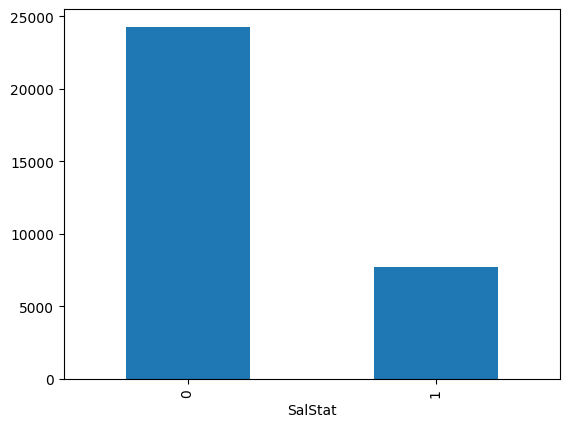

In [10]:
df.SalStat.value_counts().plot.bar()

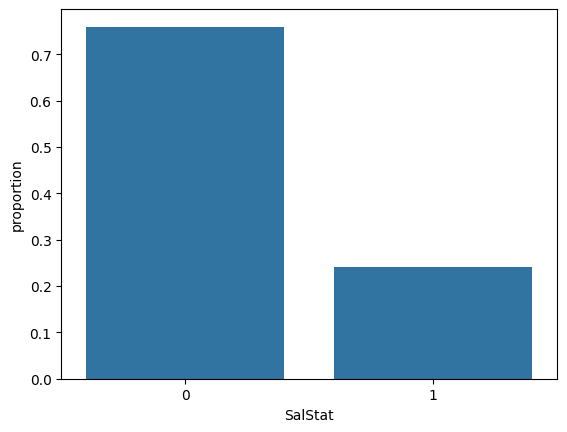

In [11]:
sns.barplot(df.SalStat.value_counts(normalize=True));

<Axes: xlabel='count'>

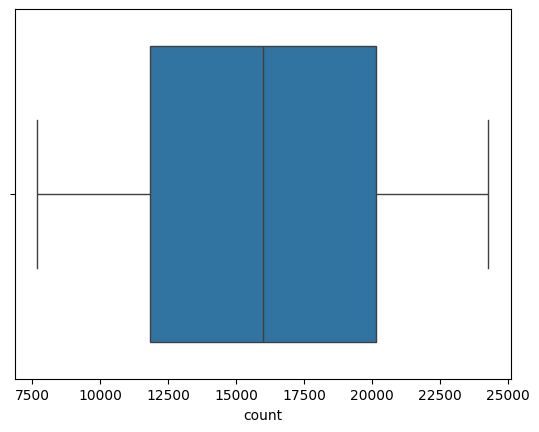

In [12]:
sns.boxplot(x = df.SalStat.value_counts())

In [13]:
# Exploring the features 

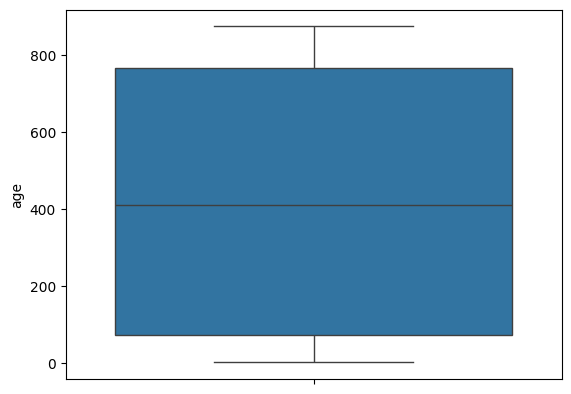

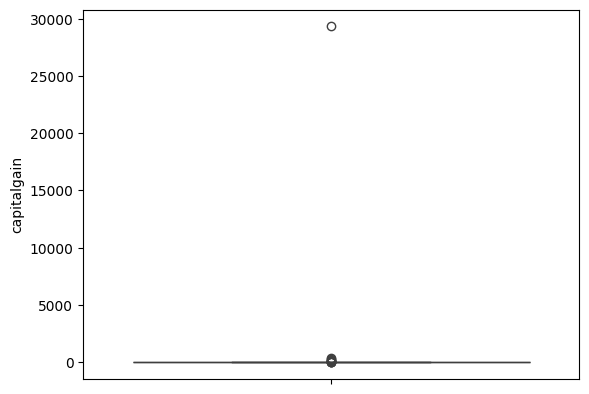

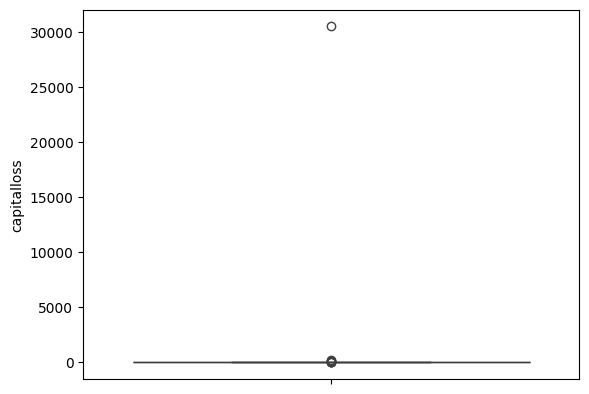

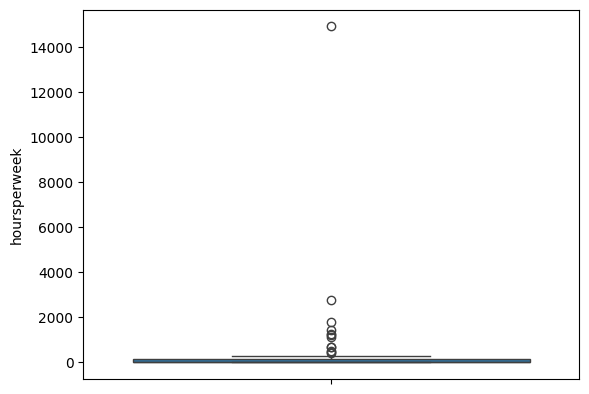

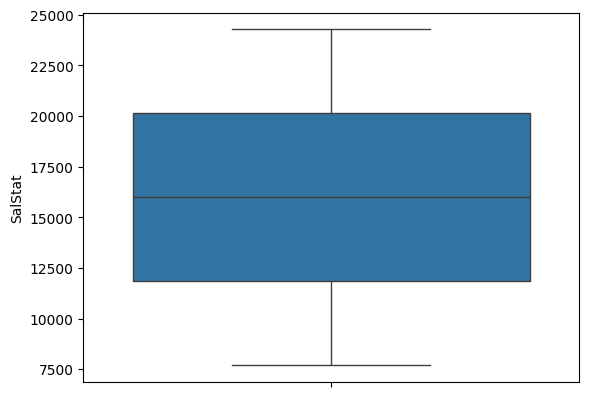

In [14]:

def boxplots(data):
    for i in data.select_dtypes('number').columns:
        sns.boxplot(data[i].value_counts()).set(ylabel = i)
        plt.show();
boxplots(df)

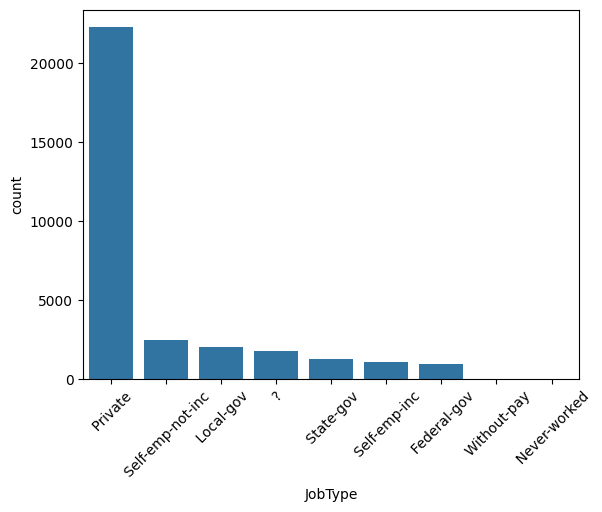

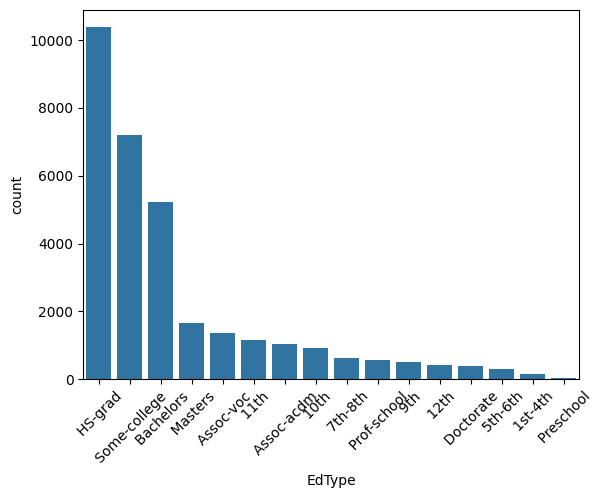

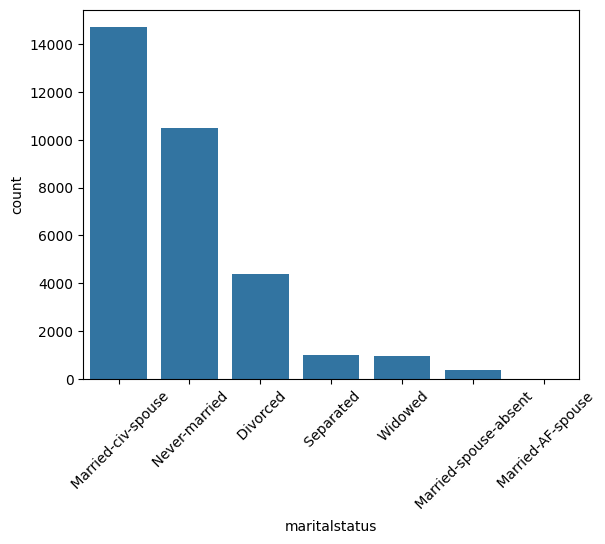

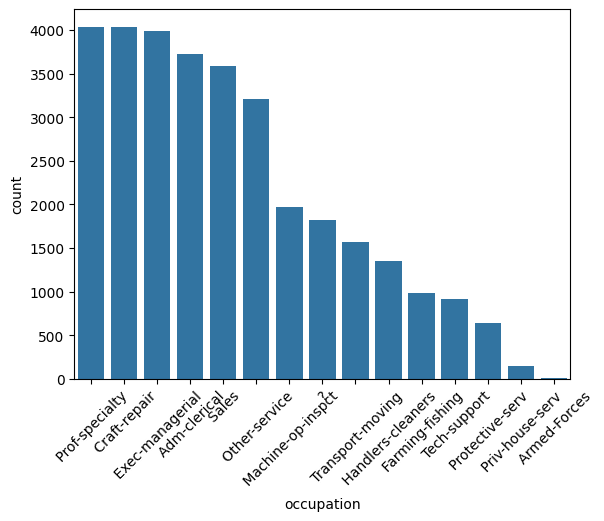

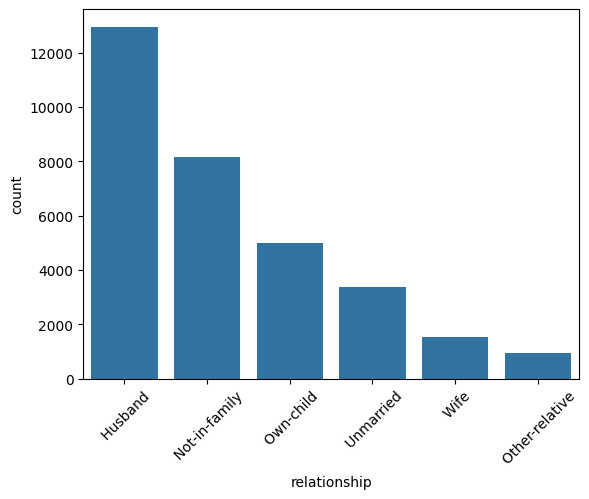

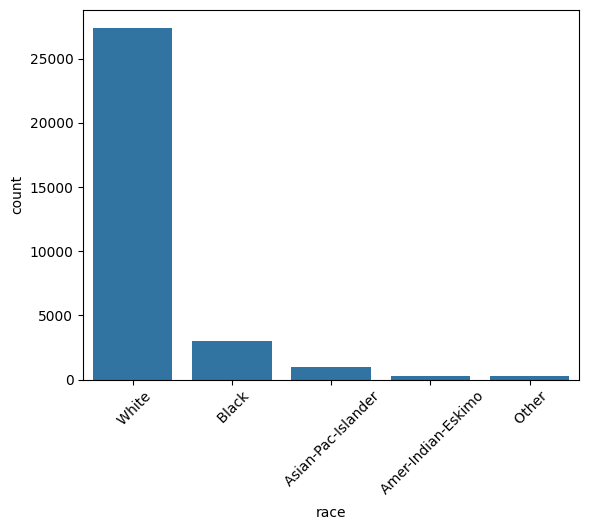

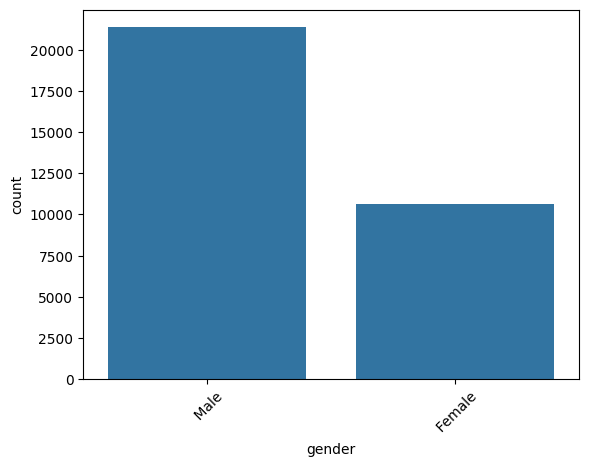

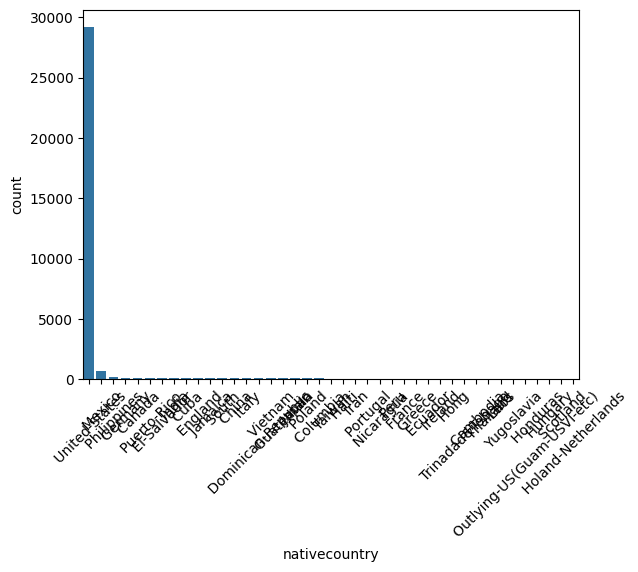

In [15]:
def barplots(data, normalize = False):
    for i in data.select_dtypes('object').columns:
        sns.barplot(data[i].value_counts(normalize= normalize))
        plt.xticks(rotation = 45)
        plt.show();
barplots(df)

In [16]:
# exploring Feature - Target Releationship

In [17]:
df.corr(numeric_only=True)

,age,capitalgain,capitalloss,hoursperweek,SalStat
age,1.000000,0.077490,0.057282,0.068299,0.233601
capitalgain,0.077490,1.000000,-0.031499,0.079112,0.222703
capitalloss,0.057282,-0.031499,1.000000,0.053106,0.149353
hoursperweek,0.068299,0.079112,0.053106,1.000000,0.230448
SalStat,0.233601,0.222703,0.149353,0.230448,1.000000


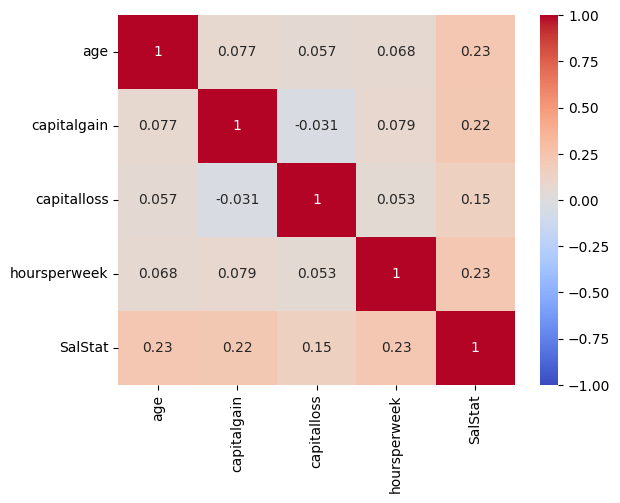

In [18]:
sns.heatmap(df.corr(numeric_only=True), vmin = -1, vmax= 1, cmap= 'coolwarm', annot = True);

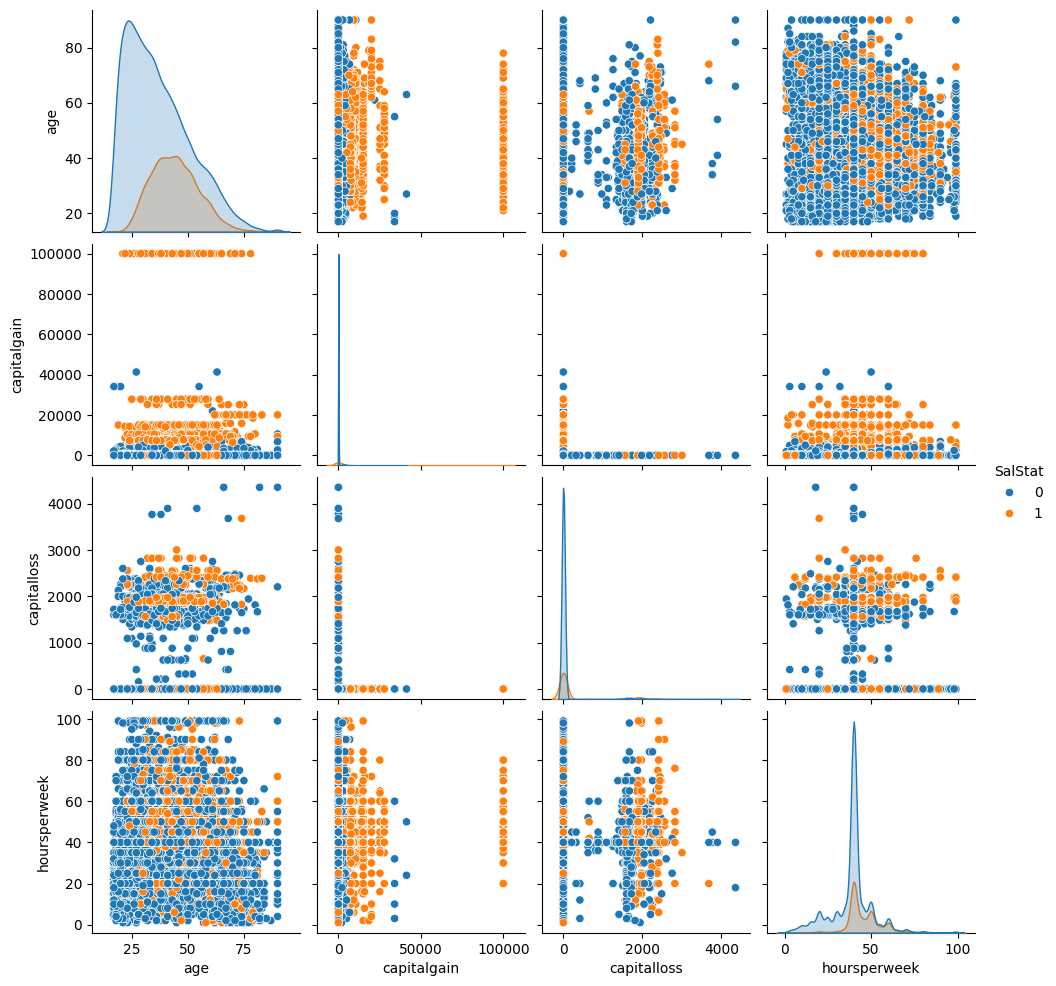

In [19]:
sns.pairplot(df, hue='SalStat');

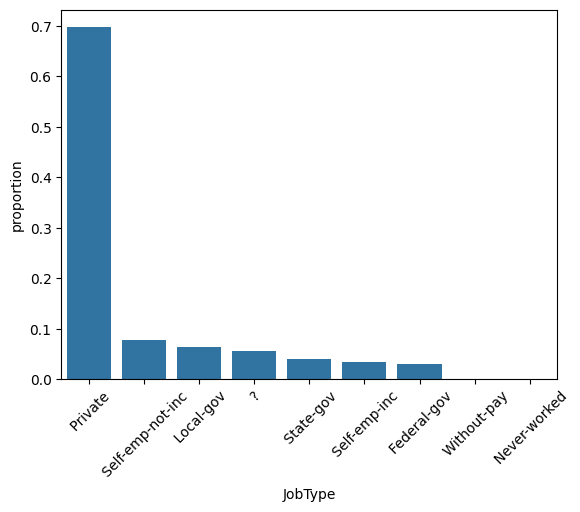

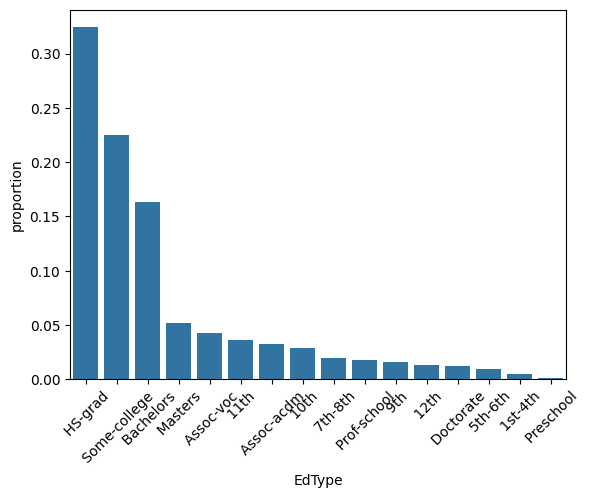

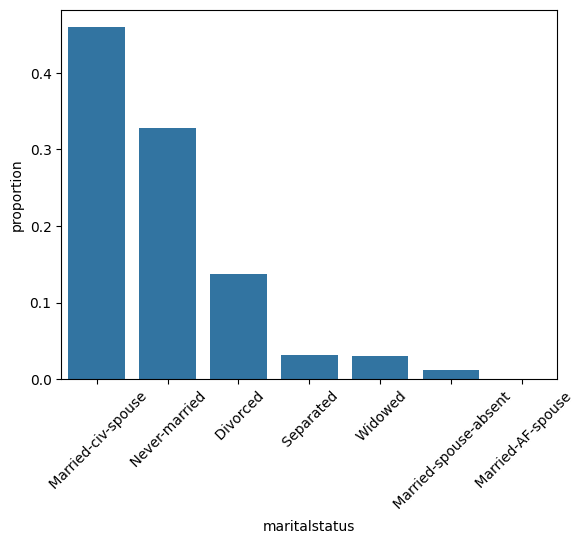

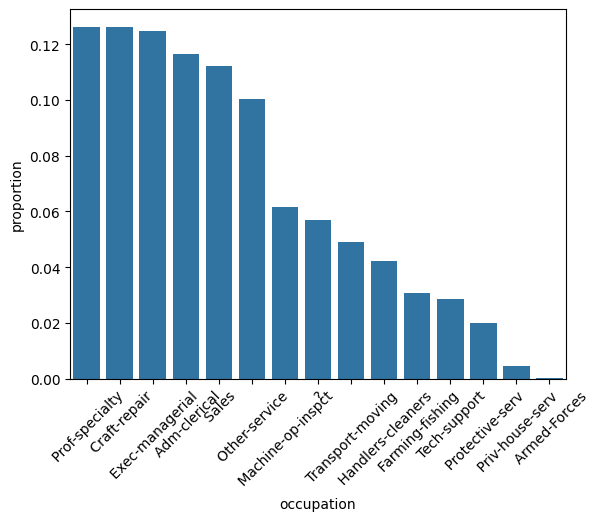

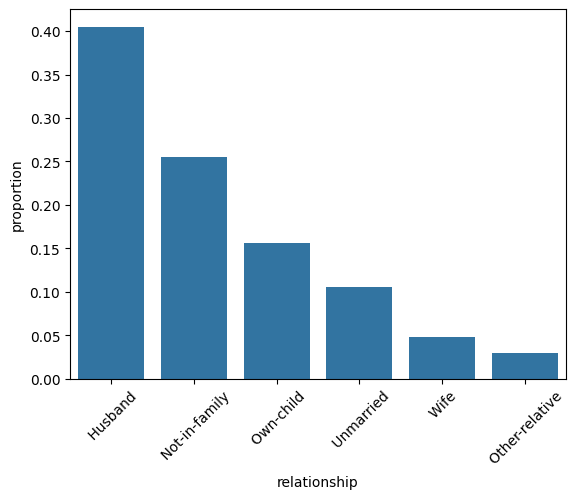

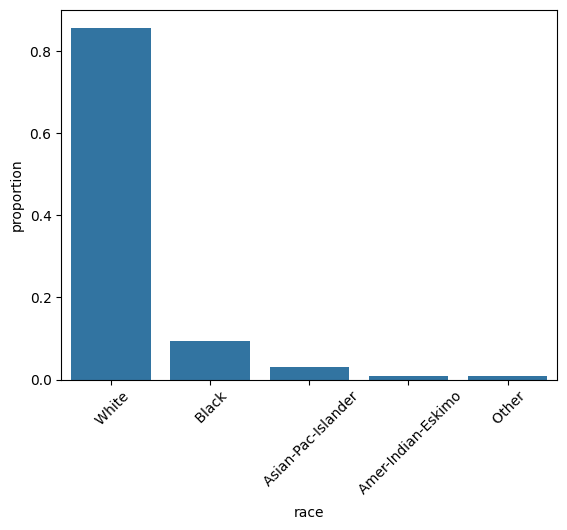

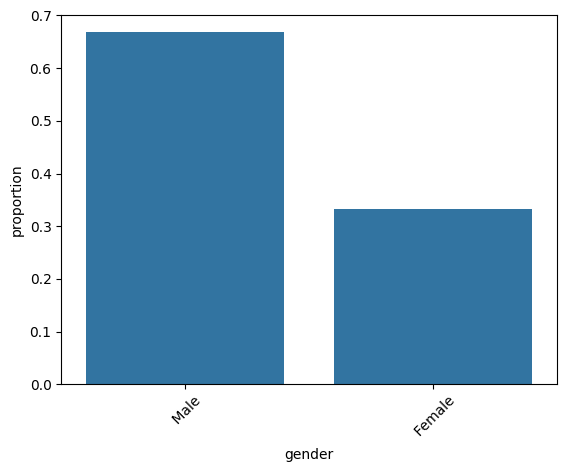

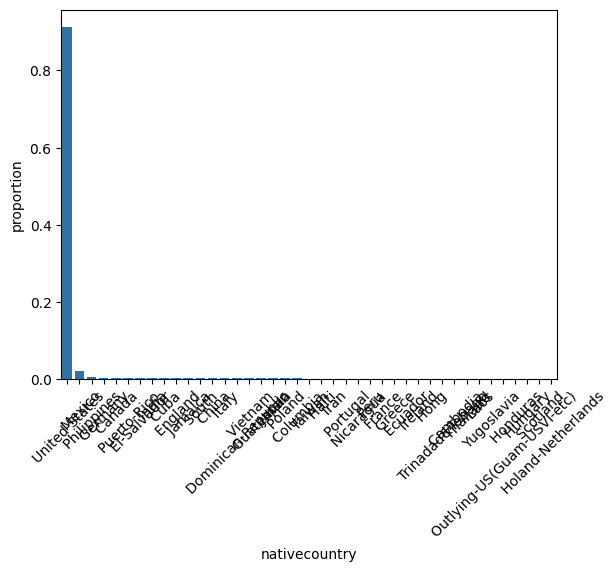

In [20]:
def bar_plots(data, Target):
    for i in data.select_dtypes('object').columns:
        sns.barplot(data = data.groupby(i, as_index= False).agg({Target :'mean'}))
        plt.show();
barplots(df, 'SalStat');

In [21]:
# Splitting the Data 

In [22]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [23]:
df.JobType.value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [24]:
df.JobType = df.JobType.str.strip()


In [35]:
df.JobType =  np.where(df.JobType =='?', 'unknown',
                       np.where(df.JobType =='Without-pay','unemployed',
                               np.where(df.JobType =='Never-worked','unemployed',df.JobType )))


In [36]:
df.JobType.value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
unknown              1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
unemployed             21
Name: count, dtype: int64

In [28]:
df.EdType.value_counts()

EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64

In [41]:
df.EdType = df.EdType.str.strip()
df.EdType = np.where(df.EdType == 'Preschool', 'Basic-Education', 
                     np.where(df.EdType == '1st-4th', 'Basic-Education',
                              np.where(df.EdType == '5th-6th', 'Basic-Education',
                                       np.where(df.EdType == '7th-8th', 'Basic-Education',
                                                np.where(df.EdType == '9th', 'Basic-Education',df.EdType)))))                           

In [42]:
df.EdType.value_counts()

EdType
HS-grad            10368
Some-college        7187
Bachelors           5210
Masters             1674
Basic-Education     1664
Assoc-voc           1366
11th                1167
Assoc-acdm          1055
10th                 921
Prof-school          559
12th                 417
Doctorate            390
Name: count, dtype: int64

In [29]:
df.maritalstatus.value_counts()

maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: count, dtype: int64

In [56]:
df.maritalstatus  = np.where(df.maritalstatus == ' Married-AF-spouse',' Married-civ-spouse', df.maritalstatus)
df.maritalstatus.value_counts()

maritalstatus
Married-civ-spouse       14715
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Name: count, dtype: int64

In [30]:
df.occupation.value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [44]:
df.occupation = df.occupation.str.strip()
df.occupation = np.where(df.occupation == '?','unknown', df.occupation)

In [53]:
df.occupation = np.where(df.occupation == 'Armed-Forces','unknown', df.occupation)
df.occupation.value_counts()

                         

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
unknown              1825
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Name: count, dtype: int64

In [31]:
df.nativecountry.value_counts()

nativecountry
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece        

In [50]:
region_mapping = {
     # North America
    'United-States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Puerto-Rico': 'North America',

    # Central America
    'El-Salvador': 'Central America',
    'Guatemala': 'Central America',
    'Honduras': 'Central America',
    'Nicaragua': 'Central America',
    'Costa Rica': 'Central America',
    'Panama': 'Central America',

    # South America
    'Columbia': 'South America',
    'Peru': 'South America',
    'Ecuador': 'South America',
    'Venezuela': 'South America',
    'Argentina': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Bolivia': 'South America',
    'Paraguay': 'South America',
    'Uruguay': 'South America',

    # Caribbean
    'Cuba': 'Caribbean',
    'Jamaica': 'Caribbean',
    'Dominican-Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Trinadad&Tobago': 'Caribbean',
    'Barbados': 'Caribbean',
    'The-Bahamas': 'Caribbean',

    # U.S. Territories
    'Outlying-US(Guam-USVI-etc)': 'U.S. Territories',

    # Fallback (any other country not mapped)
    'Unknown': 'Other',

    # Europe
    'Germany': 'Europe',
    'England': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'France': 'Europe',
    'Greece': 'Europe',
    'Ireland': 'Europe',
    'Scotland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe',
    'Yugoslavia': 'Europe',

    # Asia
    'Philippines': 'Asia',
    'India': 'Asia',
    'China': 'Asia',
    'Vietnam': 'Asia',
    'Japan': 'Asia',
    'Taiwan': 'Asia',
    'Iran': 'Asia',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Hong': 'Asia',

    # Africa
    'South': 'Africa',  # Assuming "South" refers to South Africa

    # Oceania
    'Australia': 'Oceania', 

    # Other
    'Unknown': 'Other'  # Add a fallback for unknown or ambiguous countries
}


In [52]:
df.nativecountry = df.nativecountry.str.strip()
df.nativecountry = df.nativecountry.map(region_mapping)
df.nativecountry.value_counts()

nativecountry
North America       30048
Asia                  671
Europe                521
Caribbean             309
Central America       217
South America         118
Africa                 80
U.S. Territories       14
Name: count, dtype: int64

In [32]:
df.race.value_counts()

race
White                 27430
Black                  3028
Asian-Pac-Islander      956
Amer-Indian-Eskimo      311
Other                   253
Name: count, dtype: int64

In [33]:
df.relationship.value_counts()

relationship
Husband           12947
Not-in-family      8156
Own-child          5005
Unmarried          3384
Wife               1534
Other-relative      952
Name: count, dtype: int64

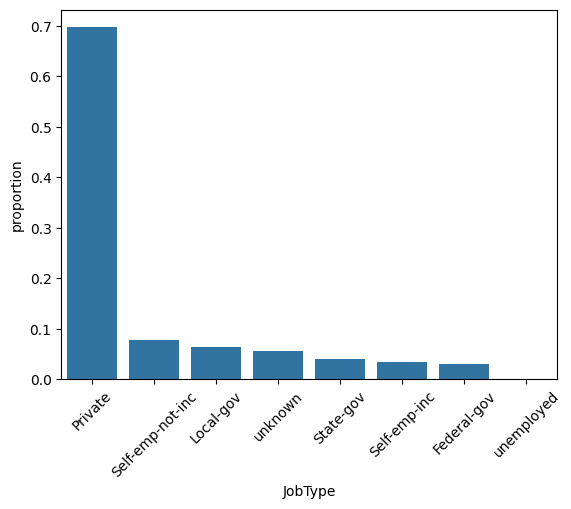

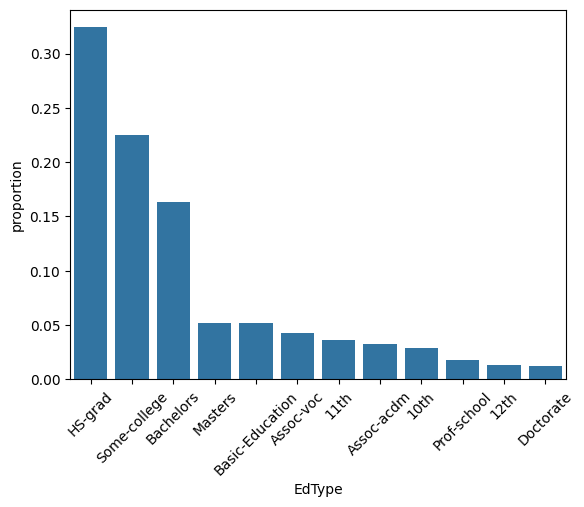

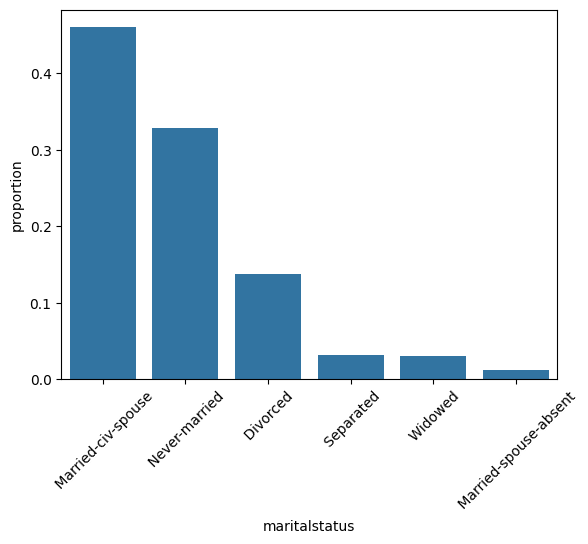

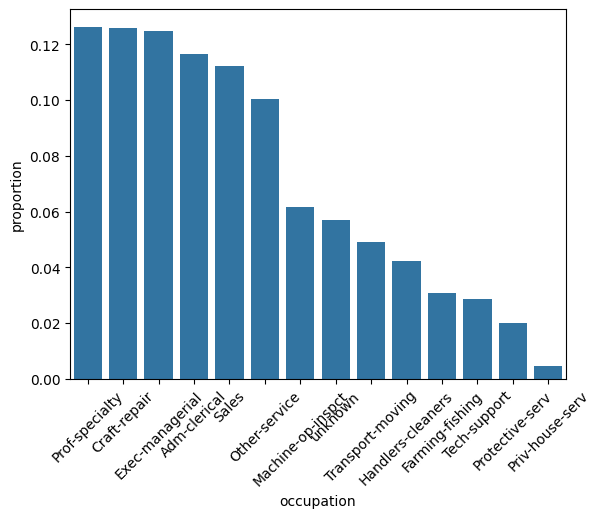

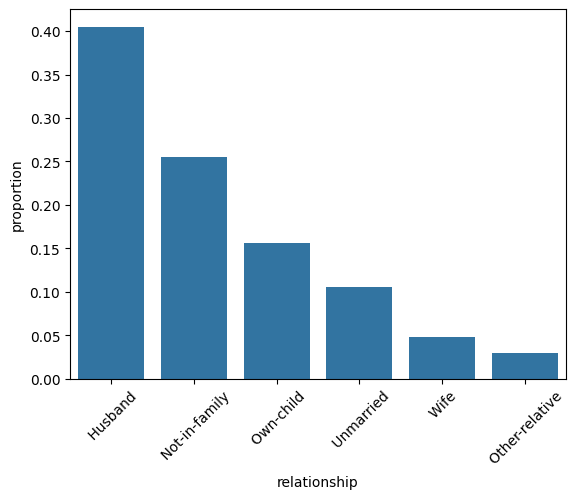

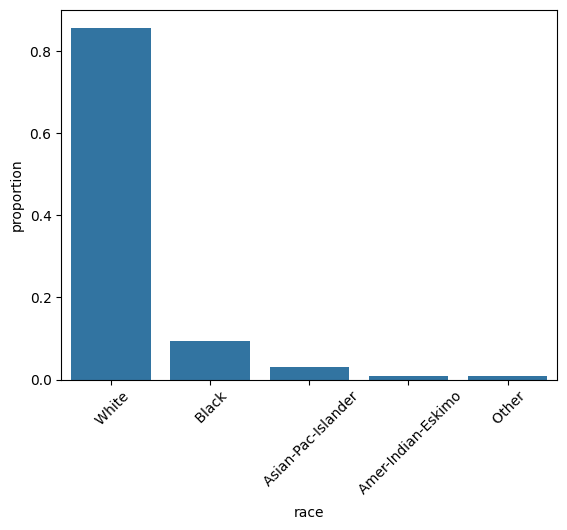

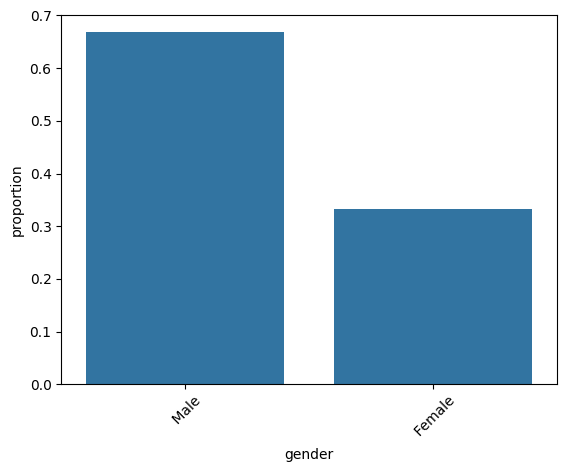

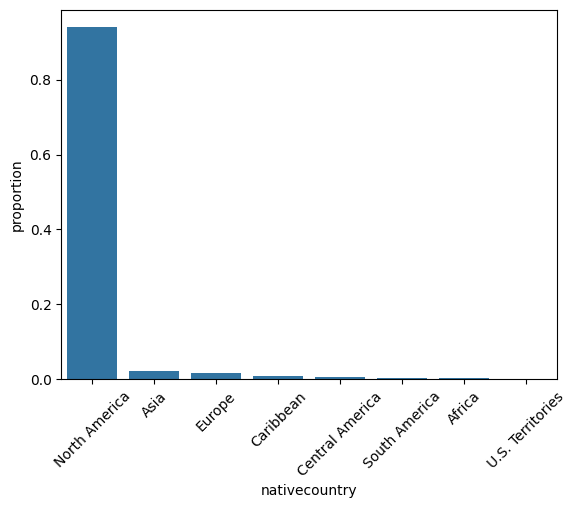

In [57]:
def bar_plots(data, Target):
    for i in data.select_dtypes('object').columns:
        sns.barplot(data = data.groupby(i, as_index= False).agg({Target :'mean'}))
        plt.show();
barplots(df, 'SalStat');

In [58]:
# Fitting a KNN model

In [59]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,North America,0
1,24,Federal-gov,HS-grad,Never-married,unknown,Own-child,White,Male,0,0,40,North America,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,North America,1
3,27,Private,Basic-Education,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,North America,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,North America,0


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [64]:
feature_engg_df = pd.get_dummies(df, drop_first=True, dtype='int')
X = feature_engg_df.drop('SalStat', axis = 1)
y = feature_engg_df.SalStat

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state= 2024)

std = StandardScaler()
X_tr_std  = std.fit_transform(X_train)
X_te_std = std.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr_std, y_train)

KNeighborsClassifier()

In [66]:
print('Train Score' , knn.score(X_tr_std, y_train))
print('Test Score' , knn.score(X_te_std, y_test))
      

Train Score 0.8739347979047768
Test Score 0.8298936835522202


In [68]:
confusion_matrix(y_train, knn.predict(X_tr_std))

array([[18146,  1249],
       [ 1976,  4211]])

In [69]:
confusion_matrix(y_test, knn.predict(X_te_std))


array([[4433,  455],
       [ 633,  875]])

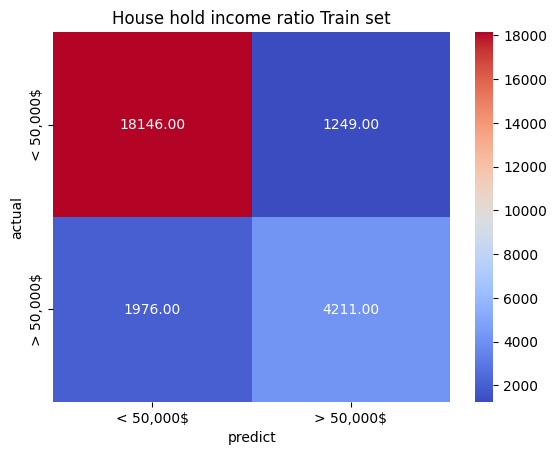

In [74]:
sns.heatmap(confusion_matrix(y_train, knn.predict(X_tr_std)), cmap= 'coolwarm', fmt='.2f', annot = True,
           xticklabels=['< 50,000$', '> 50,000$'],
           yticklabels=['< 50,000$', '> 50,000$'])
plt.xlabel('predict')
plt.ylabel('actual')
plt.title('House hold income ratio Train set')
plt.show();

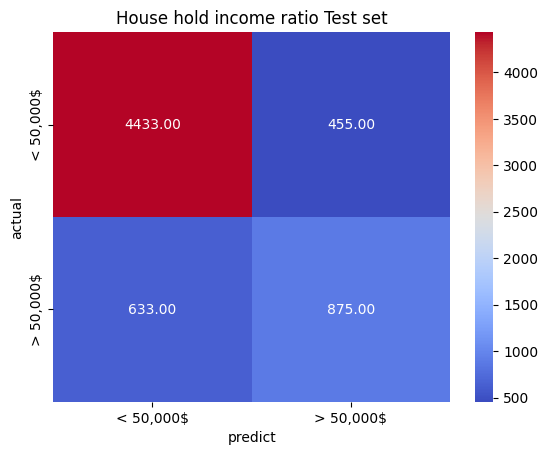

In [77]:
y_test_pred = confusion_matrix(y_test, knn.predict(X_te_std))

sns.heatmap(y_test_pred, cmap= 'coolwarm', fmt='.2f', annot = True,
           xticklabels=['< 50,000$', '> 50,000$'],
           yticklabels=['< 50,000$', '> 50,000$'])
plt.xlabel('predict')
plt.ylabel('actual')
plt.title('House hold income ratio Test set')
plt.show();

<Axes: xlabel='age', ylabel='hoursperweek'>

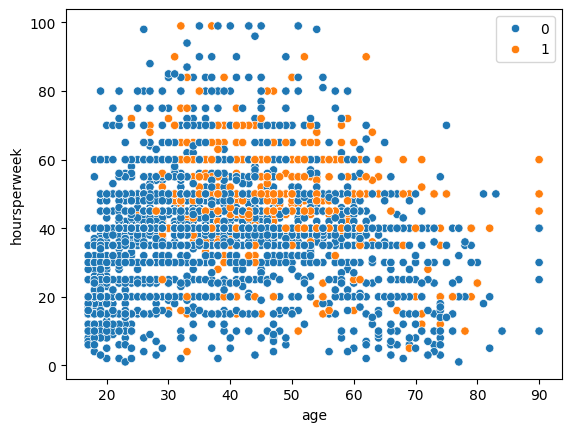

In [81]:
sns.scatterplot(X_test, x='age', y='hoursperweek', hue = knn.predict(X_te_std))

In [86]:
print('Train Score' , accuracy_score(y_train, knn.predict(X_tr_std)))
print('Test Score' , accuracy_score(y_test, knn.predict(X_te_std)))

Train Score 0.8739347979047768
Test Score 0.8298936835522202


In [87]:
# we can use knn.score or accuracy score from scikit learn library to get the accuracy score.

[Text(0.5, 0, 'k'), Text(0, 0.5, 'Test Accuracy')]

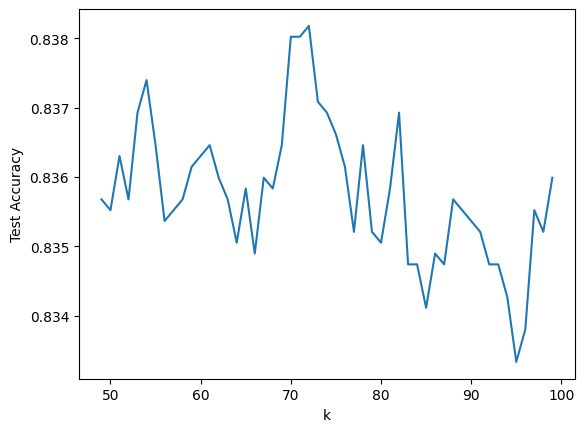

In [100]:
accuracy= []
for i in range(49,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr_std, y_train)
    accuracy_scores = accuracy_score(y_test, knn.predict(X_te_std))
    accuracy.append(accuracy_scores)

sns.lineplot(x = range(49,100), y = accuracy).set(xlabel = 'k', ylabel ='Test Accuracy')
                                     
    
    

In [104]:
# fitting cross validation

In [106]:
from sklearn.model_selection  import GridSearchCV
parameters = {'n_neighbors' : range(1,50), 'metric':['minkowski','manhattan']}

gridSearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridSearch.fit(X_tr_std, y_train)
gridSearch.best_params_


{'metric': 'manhattan', 'n_neighbors': 35}

In [109]:
knn2 = KNeighborsClassifier(n_neighbors=35, metric='manhattan')
knn.fit(X_tr_std, y_train)
knn.score(X_tr_std, y_train)

0.8303885544523493

In [110]:
knn.score(X_te_std, y_test)

0.8359912445278299

In [114]:
actual_Predict = pd.DataFrame({'actual': y_train, 'predict': knn.predict_proba(X_tr_std)[:,1]})
actual_Predict.head()

,actual,predict
15023,0,0.020202
7071,1,0.515152
3843,1,0.121212
21127,1,0.363636
16993,0,0.202020


In [123]:
bins = np.linspace(0,1,11)
actual_Predict['predict_prob'] = pd.cut(actual_Predict['predict'], bins=bins,labels=bins[:-1] )
actual_Predict.head()

,actual,predict,predict_prob
15023,0,0.020202,0.0
7071,1,0.515152,0.5
3843,1,0.121212,0.1
21127,1,0.363636,0.3
16993,0,0.202020,0.2


In [127]:
event_rate = actual_Predict.groupby('predict_prob').agg({'actual':'mean', 'predict':'mean'})

C:\Users\KishoreKiran\AppData\Local\Temp\ipykernel_17740\4051533215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_rate = actual_Predict.groupby('predict_prob').agg({'actual':'mean', 'predict':'mean'})


In [129]:
event_rate

,actual,predict
predict_prob,,
0.0,0.024661,0.041432
0.1,0.115492,0.145639
0.2,0.218762,0.242458
0.3,0.329936,0.347366
0.4,0.469897,0.447485
0.5,0.586483,0.546695
0.6,0.646474,0.646638
0.7,0.756170,0.754265
0.8,0.879383,0.843626


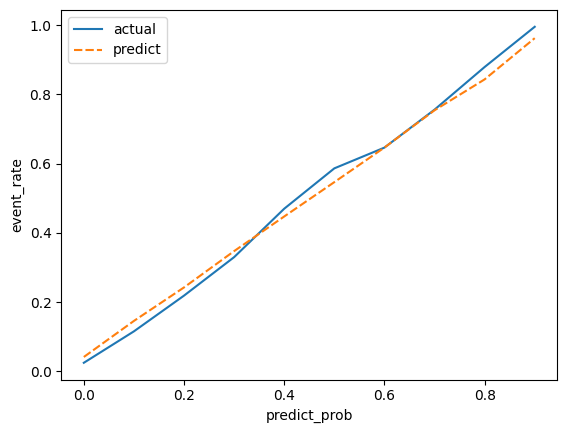

In [130]:
sns.lineplot(event_rate)
plt.ylabel('event_rate')
plt.show()

C:\Users\KishoreKiran\AppData\Local\Temp\ipykernel_17740\4004283698.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_rate_test = actual_Predict_test.groupby('predict_prob').agg({'actual':'mean', 'predict':'mean'})


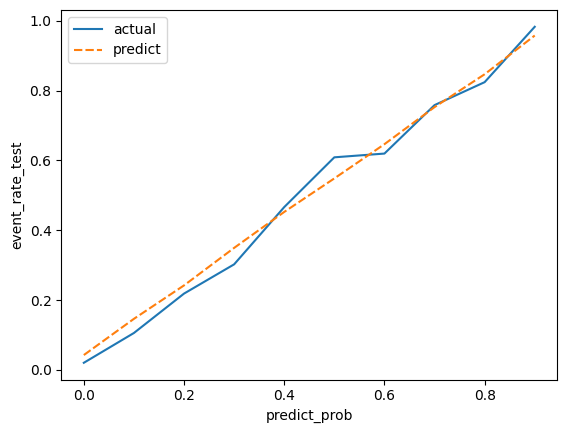

In [132]:
actual_Predict_test = pd.DataFrame({'actual': y_test, 'predict': knn.predict_proba(X_te_std)[:,1]})
actual_Predict_test.head()
bins = np.linspace(0,1,11)
actual_Predict_test['predict_prob'] = pd.cut(actual_Predict_test['predict'], bins=bins,labels=bins[:-1] )
event_rate_test = actual_Predict_test.groupby('predict_prob').agg({'actual':'mean', 'predict':'mean'})
sns.lineplot(event_rate_test)
plt.ylabel('event_rate_test')
plt.show()

In [136]:
confusion_matrix(y_train, knn.predict(X_tr_std))

array([[18101,  1294],
       [ 3045,  3142]])

In [135]:
confusion_matrix(y_test, knn.predict(X_te_std))

array([[4558,  330],
       [ 719,  789]])